In [2]:
import os
from os import path

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = 'C:/Prabal/projects/fruit and vegitable detection/train'
valid_dir = 'C:/Prabal/projects/fruit and vegitable detection/validation'
test_dir = 'C:/Prabal/projects/fruit and vegitable detection/test'

In [4]:
print(len(train_dir))

54


In [5]:
totalFiles = 0

for root, dirs, files in os.walk(train_dir):
        for Files in files:
#             print(root)
            totalFiles += 1
        print("{} files in {}".format(len(files),root))
        
print('total files:', totalFiles)

0 files in C:/Prabal/projects/fruit and vegitable detection/train
68 files in C:/Prabal/projects/fruit and vegitable detection/train\apple
75 files in C:/Prabal/projects/fruit and vegitable detection/train\banana
88 files in C:/Prabal/projects/fruit and vegitable detection/train\beetroot
90 files in C:/Prabal/projects/fruit and vegitable detection/train\bell pepper
92 files in C:/Prabal/projects/fruit and vegitable detection/train\cabbage
89 files in C:/Prabal/projects/fruit and vegitable detection/train\capsicum
82 files in C:/Prabal/projects/fruit and vegitable detection/train\carrot
79 files in C:/Prabal/projects/fruit and vegitable detection/train\cauliflower
87 files in C:/Prabal/projects/fruit and vegitable detection/train\chilli pepper
87 files in C:/Prabal/projects/fruit and vegitable detection/train\corn
94 files in C:/Prabal/projects/fruit and vegitable detection/train\cucumber
84 files in C:/Prabal/projects/fruit and vegitable detection/train\eggplant
92 files in C:/Prabal/p

In [6]:
def get_file_name(path):
    return os.listdir(path)
name=get_file_name(train_dir)
print(name)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [7]:
def transform_dt(path):
    tf_ds=tf.keras.utils.image_dataset_from_directory(path,labels='inferred',label_mode='categorical',image_size=(128,128),batch_size=32,seed=42)
    print("data set from directory has been created")
    return tf_ds

In [8]:
train_ds=transform_dt(train_dir)
valid_ds=transform_dt(valid_dir)
test_ds=transform_dt(valid_dir)

Found 3115 files belonging to 36 classes.
data set from directory has been created
Found 351 files belonging to 36 classes.
data set from directory has been created
Found 351 files belonging to 36 classes.
data set from directory has been created


In [9]:
class_name=train_ds.class_names
print(class_name)
print(len(class_name))

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']
36


In [10]:
train_ds.take(1)

<TakeDataset shapes: ((None, 128, 128, 3), (None, 36)), types: (tf.float32, tf.float32)>

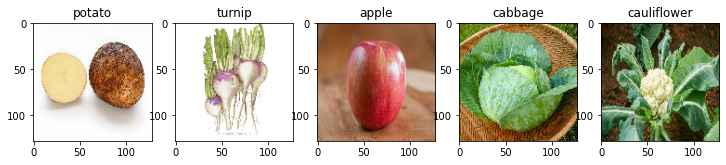

In [11]:
plt.figure(figsize=(25,20))
for image,label in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(1, 10, i+1)
        plt.imshow(image[i].numpy().astype('int'))
        plt.title(train_ds.class_names[tf.argmax(label[i])])

In [12]:
data_augmentation=keras.Sequential([layers.RandomFlip('horizontal_and_vertical'),layers.RandomRotation(0.2)])

rescaling=keras.Sequential([layers.Rescaling(1./255)])

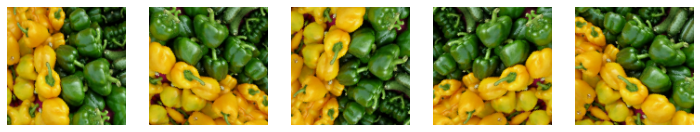

In [13]:
plt.figure(figsize=(25,20))
for image, label in train_ds.take(1):
    for i in range(5):
        augmentation=data_augmentation(image)
        ax=plt.subplot(1,10,i+1)
        plt.imshow(augmentation[0].numpy().astype('uint8'))
        plt.axis('off')

In [14]:
for image,label in train_ds:
    print(image.shape)
    print(label.shape)
    
    break

(32, 128, 128, 3)
(32, 36)


In [15]:
train_ds = train_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
valid_ds = valid_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
res50=ResNet50(include_top= False, weights='imagenet', input_shape=(128,128,3))
res50.trainable=False

In [17]:
model=Sequential()
model.add(res50)
model.add(layers.Flatten())
model.add(layers.Activation('relu'))
model.add(layers.Dense(36))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 activation (Activation)     (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 36)                1179684   
                                                                 
 activation_1 (Activation)   (None, 36)                0         
                                                                 
Total params: 24,767,396
Trainable params: 1,179,684
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history=model.fit(train_ds,validation_data=valid_ds,epochs=15)
# history=model.fit(train_ds, batch_size=32, epochs=5, validation_data=valid_ds, callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])

Epoch 1/15
98/98 [==============================] - 211s 2s/step - loss: 8.1957 - accuracy: 0.4690 - val_loss: 1.1053 - val_accuracy: 0.9003
Epoch 2/15
98/98 [==============================] - 173s 2s/step - loss: 1.7848 - accuracy: 0.8459 - val_loss: 2.2866 - val_accuracy: 0.9088
Epoch 3/15
98/98 [==============================] - 168s 2s/step - loss: 1.1730 - accuracy: 0.9088 - val_loss: 2.0636 - val_accuracy: 0.8803
Epoch 4/15
98/98 [==============================] - 170s 2s/step - loss: 1.1677 - accuracy: 0.9191 - val_loss: 2.0281 - val_accuracy: 0.9088
Epoch 5/15
98/98 [==============================] - 171s 2s/step - loss: 0.9881 - accuracy: 0.9374 - val_loss: 1.4018 - val_accuracy: 0.9487
Epoch 6/15
98/98 [==============================] - 170s 2s/step - loss: 1.0130 - accuracy: 0.9435 - val_loss: 1.5665 - val_accuracy: 0.9088
Epoch 7/15
98/98 [==============================] - 168s 2s/step - loss: 0.8392 - accuracy: 0.9573 - val_loss: 1.5733 - val_accuracy: 0.9430
Epoch 8/15
98

In [28]:
arr=model.evaluate(train_ds, verbose=1)

98/98 [==============================] - 151s 2s/step - loss: 0.5780 - accuracy: 0.9689


In [35]:
print("accuracy =", arr[1])

accuracy = 0.9688603281974792


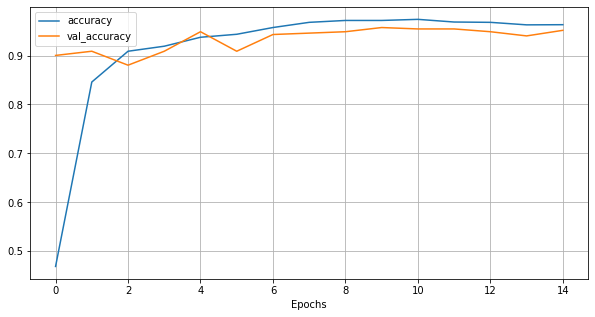

In [36]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.grid(True)
plt.legend(['accuracy', 'val_accuracy'])
plt.xlabel('Epochs')
plt.show()